In [19]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import collections

In [21]:
dir = "/Users/jifeihe/Desktop/Capstone/data"
os.chdir(dir)

In [22]:
# bbs_non_label = np.loadtxt('bbs-train.txt')
# label = np.loadtxt('label-train-dummy.txt')

In [23]:
#Balanced data
bbs_non_label = np.loadtxt('train2928.txt')
label = np.loadtxt('label2928.txt')

In [31]:
def get_data():
    dir = "/Users/jifeihe/Desktop/Capstone/data"
    os.chdir(dir)
    
    X = np.loadtxt('train2928.txt')
    Y = np.loadtxt('label2928.txt')[:,1]
    return X,Y
x, Y = get_data()
print(x[:10])

[[    234.4     271.9     310.2 ...,     492.4     424.3     361.1]
 [    942.3    1069.5    1153.2 ...,     775.6     607.9     478.8]
 [   1148.4    1240.     1331.7 ...,    1157.9     991.5     825. ]
 ..., 
 [ 132083.8  145980.4  159877.  ...,  150554.8  137723.7  124892.6]
 [   1047.8    1217.1    1370.9 ...,    1420.5    1374.5    1343.9]
 [  12426.9   13960.4   15491.9 ...,   16270.4   14792.7   13429. ]]


shape = (len(bbs_non_lable), len(bbs_non_lable[1,])+1)
bbs_lable = np.zeros(shape)

for i in range(len(bbs_non_lable)):
    bbs_lable[i,] = np.append(bbs_non_lable[i,], lable[i][1])

In [25]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 10), copy=True)
scaler.fit(bbs_non_label)

bbs = scaler.transform(bbs_non_label)

# x_train, x_test, y_train, y_test = train_test_split(bbs, label, test_size=0.3, random_state=0)

In [27]:
# input
x = tf.placeholder("float", [None, 800])
y_ = tf.placeholder("float", [None, 2])

# inference
W = tf.Variable(tf.zeros([800, 2]))
b = tf.Variable(tf.zeros([1, 2]))
matm=tf.matmul(x,W)

In [28]:
y = tf.nn.softmax(tf.matmul(x,W) + b)
y_pred_cls = tf.argmax(y,axis=1)

# loss
#cross_entropy = -tf.reduce_sum(y_*tf.log(y))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits= y)

# training
train_step = tf.train.GradientDescentOptimizer(1e-3).minimize(cross_entropy)

#saver
saver = tf.train.Saver()

# training cycles
sess = tf.Session()
sess.run(tf.global_variables_initializer())




batch_size = 100

for i in range(10):
    random_select = np.random.randint(0,len(label), batch_size)
    xs = [bbs[k] for k in random_select]
    ys = [label[k] for k in random_select]
        
    batch_xs = np.array(xs)
    batch_ys = np.array(ys)
    
    for j in range(800):
        sess.run((train_step, y), feed_dict={x: batch_xs, y_: batch_ys})
        #sess.run(y_list,feed_dict={x: x_test, y_: y_test})
        #_, y_pred = sess.run((train_step, y), feed_dict={x: batch_xs, y_: batch_ys})
    correct_prediction = tf.equal(tf.argmax(y,axis=1), tf.argmax(y_,axis=1)) # y=(m*c) so axis=1 along c
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print "batch%d: "%i, sess.run(accuracy, feed_dict={x: bbs, y_: label})
    #print sess.run(correct_prediction, feed_dict={x: batch_xs, y_: batch_ys})
    #print sess.run(accuracy, feed_dict={x: batch_xs, y_: batch_ys})
    
print sess.run(correct_prediction, feed_dict={x: bbs, y_: label})
print sess.run(accuracy, feed_dict={x: bbs, y_: label})
print  sess.run(y, feed_dict={x: bbs, y_: label})
saver.save(sess, 'Model/my_test_model.ckpt')

batch0:  0.747609
batch1:  0.772199
batch2:  0.760929
batch3:  0.764344
batch4:  0.760246
batch5:  0.742145
batch6:  0.740437
batch7:  0.764686
batch8:  0.768101
batch9:  0.76127
[ True  True  True ...,  True  True  True]
0.76127
[[ 0.91883266  0.08116733]
 [ 0.86342305  0.13657701]
 [ 0.81812543  0.18187459]
 ..., 
 [ 0.94177878  0.05822129]
 [ 0.91550088  0.08449912]
 [ 0.94728237  0.05271757]]


'Model/my_test_model.ckpt'

In [29]:
correct_prediction=sess.run(correct_prediction, feed_dict={x: bbs, y_: label})


In [32]:
w = sess.run(W)

In [36]:
err = w.dot(correct_prediction)

ValueError: shapes (800,2) and (2928,) not aligned: 2 (dim 1) != 2928 (dim 0)

In [199]:
index = [] 
for i in range(len(correct_prediction)):
    if correct_prediction[i]==False:
#         bbs_1 = np.delete(bbs,(i),axis=0)
        index.append(i)
print len(index)

721


In [200]:
for i in range(len(y_pred_array_cls)):
    bbs_1 = np.delete(bbs,index,0)
print len(bbs_1)

2207


In [178]:
y_pred_array=sess.run(y, feed_dict={x: bbs, y_: label})

In [179]:
# y_pred_array[:12]

In [180]:
[abs(np.diff(y_pred_array[r])[0]) for r in range(len(y_pred_array))][:12]

[0.90873349,
 0.85117954,
 0.80586177,
 0.90291011,
 0.86918437,
 0.45521727,
 0.99999833,
 1.0,
 0.72605169,
 0.99999982,
 0.86479008,
 1.0]

In [181]:
#[abs(np.diff(y_pred_array[r],axis=0)) for r in range(len(y_pred_array))][:12]

In [182]:
lst = []
for r in range(len(y_pred_array)):
    if abs(np.diff(y_pred_array[r])[0]) > 0.8:
        lst.append(2)
    else:
        pick01 = y_pred_array[r].argmax()
        lst.append(pick01)
y_pred_array_cls = np.array(lst)

In [183]:
y_pred_array_cls[:20]

array([2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2])

In [184]:
collections.Counter(y_pred_array_cls)
#2: dubious 1:true_good-pre_good 0:true_bad-pre_bad

Counter({0: 716, 1: 343, 2: 1869})

In [185]:
print len(y_pred_array_cls)
print len(bbs)

2928
2928


In [146]:
index = [] 
for i in range(len(y_pred_array_cls)):
    if y_pred_array_cls[i]==2:
#         bbs_1 = np.delete(bbs,(i),axis=0)
        index.append(i)
print len(index)

1637


In [147]:
#????????????????????????????????????????
# for i in range(len(y_pred_array_cls)):
#     if y_pred_array_cls[i]==2:
#         bbs_1 = np.delete(bbs,(i),axis=0)

In [148]:
for i in range(len(y_pred_array_cls)):
    bbs_1 = np.delete(bbs,index,0)
print len(bbs_1)

1291


In [149]:
for i in range(len(y_pred_array_cls)):
    label_1 = np.delete(label,index,axis=0)
print len(label_1)        

1291


In [165]:
#Use restored model to train without 2

with tf.Session() as sess:
    # Restore the model
    saver.restore(sess,'Model/my_test_model.ckpt')

    for i in range(10):
        random_select = np.random.randint(0,len(label_1), batch_size)
        xs = [bbs_1[k] for k in random_select]
        ys = [label_1[k] for k in random_select]

        batch_xs = np.array(xs)
        batch_ys = np.array(ys)

        for j in range(800):
            sess.run((train_step, y), feed_dict={x: batch_xs, y_: batch_ys})
            #sess.run(y_list,feed_dict={x: x_test, y_: y_test})
            #_, y_pred = sess.run((train_step, y), feed_dict={x: batch_xs, y_: batch_ys})
        correct_prediction = tf.equal(tf.argmax(y,axis=1), tf.argmax(y_,axis=1)) # y=(m*c) so axis=1 along c
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print "batch%d: "%i, sess.run(accuracy, feed_dict={x: bbs, y_: label})
        #print sess.run(correct_prediction, feed_dict={x: batch_xs, y_: batch_ys})
        #print sess.run(accuracy, feed_dict={x: batch_xs, y_: batch_ys})

    print sess.run(accuracy, feed_dict={x: bbs, y_: label})
    print  sess.run(y, feed_dict={x: bbs, y_: label})
    saver.save(sess, 'Model/my_model_1.ckpt')
    y_pred_array_1=sess.run(y, feed_dict={x: bbs, y_: label})

INFO:tensorflow:Restoring parameters from Model/my_test_model.ckpt
batch0:  0.756489
batch1:  0.748292
batch2:  0.737705
batch3:  0.733948
batch4:  0.748292
batch5:  0.740096
batch6:  0.696038
batch7:  0.733265
batch8:  0.742145
batch9:  0.744194
0.744194
[[ 0.9590885   0.04091157]
 [ 0.93191451  0.06808545]
 [ 0.91171962  0.08828045]
 ..., 
 [ 0.97110695  0.02889311]
 [ 0.95784652  0.04215351]
 [ 0.9736467   0.02635326]]


In [166]:
[abs(np.diff(y_pred_array_1[r])[0]) for r in range(len(y_pred_array))][:12]

[0.91817695,
 0.86382908,
 0.82343918,
 0.91287953,
 0.87921751,
 0.42730263,
 0.99999923,
 1.0,
 0.72972506,
 1.0,
 0.8747828,
 1.0]

In [167]:
lst_1 = []
for r in range(len(y_pred_array_1)):
    if abs(np.diff(y_pred_array_1[r])[0]) < 0.8:
        lst_1.append(2)
    else:
        pick01 = y_pred_array[r].argmax()
        lst_1.append(pick01)
y_pred_array_cls_1 = np.array(lst_1)

In [168]:
collections.Counter(y_pred_array_cls_1)
#Compare to prviou: Counter({0: 529, 1: 1119, 2: 1280})
#Counter({0: 145, 1: 1146, 2: 1637}

Counter({0: 938, 1: 992, 2: 998})

In [ ]:
#Prepare data for model_2
index = [] 
for i in range(len(y_pred_array_cls_1)):
    if y_pred_array_cls[i]==2:
#         bbs_1 = np.delete(bbs,(i),axis=0)
        index.append(i)
print len(index)


for i in range(len(y_pred_array_cls)):
    bbs_1 = np.delete(bbs,index,0)
print len(bbs_1)

for i in range(len(y_pred_array_cls)):
    label_1 = np.delete(label,index,axis=0)
print len(label_1)

In [ ]:
with tf.Session() as sess:
    
    # Restore the model
    saver.restore(sess,'Model/my_model_1.ckpt')
    

    # Fetch Back Results
    restored_slope , restored_intercept = sess.run([m,b])

In [ ]:
def plot_example_errors():
    correct, cls_pred = sess.run([correct_prediction, y_pred_cls], 
                                 feed_dict=feed_dict_test)
    incorrect = (correct==False)
    incorrect_images = X_test[incorrect]
    incorrect_cls_pred = cls_pred[incorrect]
    incorrect_cls_true = test_cls[incorrect]
    
    plot_images(images=incorrect_images[0:12], 
                cls_true=incorrect_cls_true[0:12], 
                cls_pred=incorrect_cls_pred[0:12])   
plot_example_errors()

In [22]:
weights = sess.run(W)
print (np.shape(weights))
print weights

(800, 2)
[[-0.02244513  0.02244513]
 [-0.02264906  0.02264905]
 [-0.02282299  0.02282298]
 ..., 
 [-0.02122365  0.02122365]
 [-0.02133389  0.02133389]
 [-0.02157903  0.02157903]]


In [23]:
weights = sess.run(W)
weights[0:200]=0
weights[600:800]=0
#new_w = tf.placeholder("float", [800, 2])
new_w = tf.convert_to_tensor(weights, dtype=tf.float32)

assign_op = W.assign(new_w)
sess.run(assign_op)

print (sess.run(accuracy, feed_dict={x: x_test, y_: y_test}))

0.679181


In [113]:
weights = sess.run(W)
weights[200:600]=0
#new_w = tf.placeholder("float", [800, 2])
new_w = tf.convert_to_tensor(weights, dtype=tf.float32)
assign_op = W.assign(new_w)
sess.run(assign_op)

weights2 = sess.run(W)
print (np.shape(weights2))
print weights2


(800, 2)
[[ 0.08168958 -0.08168956]
 [ 0.01729944 -0.01729944]
 [-0.0378467   0.03784677]
 ..., 
 [-0.00576442  0.0057645 ]
 [ 0.0121123  -0.01211222]
 [ 0.02230204 -0.02230201]]


In [104]:
#sess.run(y, feed_dict={x: x_test, y_: y_test})
print (sess.run(accuracy, feed_dict={x: x_test, y_: y_test}))

0.679181


In [60]:
print(weights[0:20])

[[-0.06809339  0.06809342]
 [-0.09169513  0.09169514]
 [-0.11473604  0.11473605]
 [-0.13280649  0.13280652]
 [-0.14758004  0.14758004]
 [-0.16046838  0.16046835]
 [-0.1716907   0.17169069]
 [-0.17618527  0.17618524]
 [-0.17373979  0.17373981]
 [-0.16632225  0.16632222]
 [-0.15941097  0.15941097]
 [-0.15379371  0.15379371]
 [-0.14482927  0.14482926]
 [-0.13659509  0.13659504]
 [-0.12515108  0.12515107]
 [-0.11015264  0.11015263]
 [-0.0947394   0.0947394 ]
 [-0.08568005  0.08568006]
 [-0.08529674  0.08529674]
 [-0.08966014  0.08966012]]


In [13]:
img_shape = [40, 20]

In [14]:
import tensorflow as tf
# new_w = hash(tuple(new_w))
#x = tf.Variable(0)
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    print sess.run(new_w, feed_dict={new_w: weights})

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 ..., 
 [-0.13038838  0.13038836]
 [-0.11753674  0.11753672]
 [-0.10794271  0.1079427 ]]


In [114]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    #weights = sess.run(W)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(weights)
    w_max = np.max(weights)

    
#     plt.figure(1)
#     plt.subplot(121)
#     plt.imshow(np.reshape(weights[:,0],img_shape))
    
#     plt.subplot(122)
#     plt.imshow(np.reshape(weights[:,1],img_shape))
    
    
    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(1, 2)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            #image = W[:, i].reshape(img_shape)
            image = np.reshape(weights[:, i],[40,20])
            print (np.shape(image))
            #image=np.array(40*20, dtype=float)
           

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
           # ax.imshow(imread(image), vmin=w_min, vmax=w_max, cmap='seismic')
            cax=ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
#         ax.set_xticks([])
#         ax.set_yticks([])
        
        
    # Ensure the plot is shown correctly with multiple plots
#     # in a single Notebook cell.
    cbar=fig.colorbar(cax,ticks=[-1, 0, 1])
    plt.show()

(40, 20)
(40, 20)


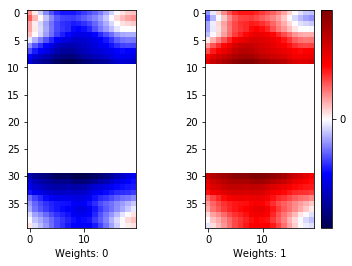

In [115]:
plot_weights()

In [37]:
correct_prediction = tf.equal(tf.argmax(y,axis=1), tf.argmax(y_,axis=1))
#correct_prediction = tf.equal(y_pred_cls, y_true_cls)
y_true_cls = tf.placeholder(tf.int64, [None])
y_ = tf.placeholder("float", [None, 2])
y_pred_cls=tf.argmax(y,axis=1)
lable_test_cls = np.array([label.argmax() for label in y_test])

feed_dict_test = {x: x_test,
                  y_: y_test,
                  y_true_cls: lable_test_cls}

In [38]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [39]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = sess.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = x_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = lable_test_cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:2],
                cls_true=cls_true[0:2],
                cls_pred=cls_pred[0:2])

In [40]:
plot_example_errors()

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_4' with dtype float and shape [?,2]
	 [[Node: Placeholder_4 = Placeholder[dtype=DT_FLOAT, shape=[?,2], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op u'Placeholder_4', defined at:
  File "/Users/jifeihe/anaconda/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/jifeihe/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-e2114ee67bd4>", line 3, in <module>
    y_ = tf.placeholder("float", [None, 2])
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/jifeihe/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_4' with dtype float and shape [?,2]
	 [[Node: Placeholder_4 = Placeholder[dtype=DT_FLOAT, shape=[?,2], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [ ]:
with sess.as_default():
    y_list.eval()

In [145]:
sess = tf.Session()
with sess.as_default():
    tensor = tf.argmax(y,axis=1)
    print (tensor.eval(sess))

TypeError: input must be a dictionary

In [ ]:
np.